In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # 한 실행칸에 프린트 여러개 해도 다 출력시키도록 하는 코드.
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns
pd.set_option('display.max_rows', 500)
from datetime import datetime
import scipy as sp
import scipy.stats
from scipy.optimize import minimize, minimize_scalar

# 1번

## (1)

In [2]:
def create():
    cnt = 0
    rows = []
    while(cnt < 3):
        row = [np.random.randint(20), np.random.randint(20)]
        if(row in rows):
            continue
        else:
            cnt = cnt + 1
            rows.append(row)
    return np.array(rows)

## (2)

In [3]:
cnt = 0
for i in range(10000):
    a1 = create()[0]
    a2 = create()[1]
    a3 = create()[2]
    if(a1[0] == a2[0] == a3[0]):
        cnt = cnt + 1
    elif(a1[1] == a2[1] == a3[1]):
        cnt = cnt + 1
    elif(((a1[0]-a2[0])/(a1[1]-a2[1])) == ((a2[0]-a3[0])/(a2[1]-a3[1]))):
        cnt = cnt + 1
    else:
        continue
print(cnt/10000)

0.0128


# 2번.

In [4]:
data = pd.read_excel('./volatility.xlsx')
data = data.set_index('date')

In [5]:
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d

In [6]:
x = np.linspace(0,len(data['2018-04':'2018-11'])-1, 8)
x

array([0., 1., 2., 3., 4., 5., 6., 7.])

In [7]:
data_vol = data['vol']
xs = pd.date_range(data.index.min(), periods = 200, freq='D')
# cs = CubicSpline(data.index, data.vol)
cs = interp1d(x, data['2018-04':'2018-11']['vol'], kind = 'cubic')

In [8]:
xint = np.linspace(x.min(), x.max(), 214)
xint = xint[:200]
col1 = pd.Series(cs(xint))
df = pd.DataFrame(columns = ['volatility', 'return', 'log_return'])
df['volatility'] = col1
df

,volatility,return,log_return
0,0.010000,NaN,NaN
1,0.009944,NaN,NaN
2,0.009888,NaN,NaN
3,0.009832,NaN,NaN
4,0.009778,NaN,NaN
5,0.009723,NaN,NaN
6,0.009669,NaN,NaN
7,0.009615,NaN,NaN
8,0.009562,NaN,NaN
9,0.009510,NaN,NaN


In [9]:
df['return'] = df['volatility'].apply(lambda x: np.random.normal(0, x))
df['log_return'] = df['return'].apply(lambda x: np.log(x+1))
df

,volatility,return,log_return
0,0.010000,-0.005532,-0.005547
1,0.009944,0.012442,0.012365
2,0.009888,0.002025,0.002023
3,0.009832,0.007673,0.007644
4,0.009778,0.001183,0.001182
5,0.009723,-0.013534,-0.013626
6,0.009669,0.013043,0.012959
7,0.009615,-0.003605,-0.003612
8,0.009562,0.012256,0.012181
9,0.009510,-0.002195,-0.002198


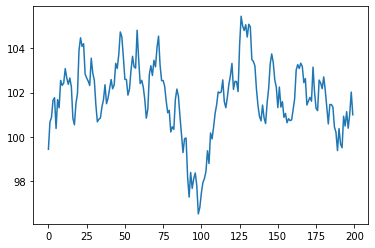

In [10]:
res = (df['log_return']+1).cumprod()
res = res*100
res.plot()
plt.show()

# 3번

## (1)

In [52]:
def opti(x):
    n = x[0]
    p = x[1]
    ret = p*((n+200-3*p)/2 * (n-200+3*p)/(100) + n*(300-3*p-n)/(100)) - 20 * n - 10 * (300-3*p-n)/2 * (300-3*p-n)/(100)
    return -ret

In [53]:
result = minimize(opti, [n0, p0])
result

      fun: -2335.0311673283845
 hess_inv: array([[ 0.00083227, -0.00016464],
       [-0.00016464,  0.00016439]])
      jac: array([0.00000000e+00, 3.05175781e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 73
      nit: 11
     njev: 18
   status: 2
  success: False
        x: array([114.79409667,  50.76387932])

In [59]:
print('p : {}\nn : {}\nprofit : {}'.format(round(result.x[1], 2), round(result.x[0], 2), round(-result.fun, 2)))

p : 50.82
n : 115.7
profit : 2324.55


## (2)

In [60]:
def opti2(x):
    n = x[0]
    p = x[1]
    d = x[2]
    ret = p*((n+200-3*p)/2 * (n-200+3*p)/(100) + n*(300-3*p-n)/(100)) - 20 * n - d * (300-3*p-n)/2 * (300-3*p-n)/(100)
    return -ret

In [61]:
n0 = 100
p0 = 50
res = pd.DataFrame(columns = ['n', 'p', 'profit'])
for d in range(13):
    bnds = ((0, np.inf), (0, np.inf), (d,d))
    result = minimize(opti2, [n0, p0, d], bounds = bnds)
    result
    n = round(result.x[1], 2)
    p = round(result.x[0], 2)
    profit = round(result.fun, 2)
    res.loc[len(res)] = (n, p, -profit)
res

      fun: -2400.3519740709926
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00000000e+00, -9.09494702e-05,  7.88854777e+00])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 40
      nit: 9
   status: 0
  success: True
        x: array([109.22399561,  50.35187322,   0.        ])

      fun: -2392.6251365161925
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.81898940e-04, -1.36424205e-04,  7.56858753e+00])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 40
      nit: 9
   status: 0
  success: True
        x: array([109.87769584,  50.40523489,   1.        ])

      fun: -2385.208116819637
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.36424205e-04, -9.09494702e-05,  7.26859071e+00])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 36
      nit: 8
   status: 0
  success: True
        x: array([110.5068753 ,  50.45517264,   2.        ])

      fun: -2378.0817892926316
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([9.09494702e-05, 4.54747351e-05, 6.98692020e+00])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 40
      nit: 8
   status: 0
  success: True
        x: array([111.1118578 ,  50.50216679,   3.        ])

      fun: -2371.2286523417633
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.54747351e-05, -4.54747351e-05,  6.72193892e+00])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 36
      nit: 7
   status: 0
  success: True
        x: array([111.69519081,  50.54628977,   4.        ])

      fun: -2364.6326507115
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.81898940e-04, 3.18323146e-04, 6.47241905e+00])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 36
      nit: 7
   status: 0
  success: True
        x: array([112.25745399,  50.58790041,   5.        ])

      fun: -2358.279021420973
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 9.09494702e-05, -4.54747351e-05,  6.23708729e+00])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 36
      nit: 7
   status: 0
  success: True
        x: array([112.79964458,  50.62716027,   6.        ])

      fun: -2352.1541600623605
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.36424205e-04, 9.09494702e-05, 6.01471584e+00])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 32
      nit: 6
   status: 0
  success: True
        x: array([113.32405642,  50.6641737 ,   7.        ])

      fun: -2346.2455041873104
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-9.09494702e-05,  9.09494702e-05,  5.80448614e+00])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 32
      nit: 6
   status: 0
  success: True
        x: array([113.83024175,  50.69926469,   8.        ])

      fun: -2340.541430959029
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.00000000e+00, 9.09494702e-05, 5.60544322e+00])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 48
      nit: 7
   status: 0
  success: True
        x: array([114.32006091,  50.73244279,   9.        ])

      fun: -2335.031167328163
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.54747351e-05,  0.00000000e+00,  5.41676854e+00])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 36
      nit: 7
   status: 0
  success: True
        x: array([114.79404243,  50.76388698,  10.        ])

      fun: -2329.704710614844
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.36424205e-04, -1.81898940e-04,  5.23773451e+00])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 32
      nit: 6
   status: 0
  success: True
        x: array([115.252966  ,  50.79371744,  11.        ])

      fun: -2324.5527582676555
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.54747351e-05, -1.36424205e-04,  5.06765900e+00])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 44
      nit: 7
   status: 0
  success: True
        x: array([115.6978624 ,  50.82205139,  12.        ])

,n,p,profit
0,50.35,109.22,2400.35
1,50.41,109.88,2392.63
2,50.46,110.51,2385.21
3,50.50,111.11,2378.08
4,50.55,111.70,2371.23
5,50.59,112.26,2364.63
6,50.63,112.80,2358.28
7,50.66,113.32,2352.15
8,50.70,113.83,2346.25
9,50.73,114.32,2340.54


### Scatter plot

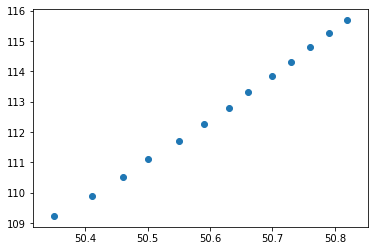

In [62]:
plt.scatter(res['n'], res['p'])
plt.show()

### line plot

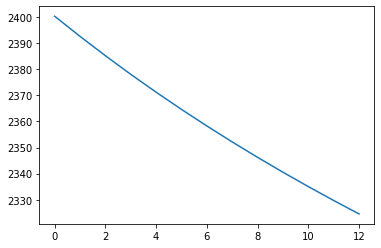

In [63]:
res['profit'].plot()
plt.show()

# 4번

In [64]:
cpi = pd.read_excel('./cpi.xlsx')
realgdp = pd.read_excel('./realgdp.xlsx')
cpi.head()
realgdp.head()

,observation_date,cpi
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


,observation_date,realgdp
0,1947-04-01,-0.4
1,1947-07-01,-0.4
2,1947-10-01,6.4
3,1948-01-01,6.0
4,1948-04-01,6.7


In [70]:
cpi_tseries = cpi.set_index('observation_date')
realgdp_tseries = realgdp.set_index('observation_date')

## (1)

In [69]:
result = cpi_tseries.resample('Y').mean()['2010' : '2017']
result

,cpi
observation_date,
2010-12-31,218.076167
2011-12-31,224.923000
2012-12-31,229.586083
2013-12-31,232.951750
2014-12-31,236.706500
2015-12-31,236.992750
2016-12-31,240.006333
2017-12-31,245.139250


## (2)

In [73]:
realgdp_tseries.head()

,realgdp
observation_date,
1947-04-01,-0.4
1947-07-01,-0.4
1947-10-01,6.4
1948-01-01,6.0
1948-04-01,6.7


In [79]:
_mean = round(realgdp_tseries['realgdp'].mean(), 3)
_std = round(realgdp_tseries['realgdp'].std(), 3)

print('GDP average : {}\nGDP standard deviation = {}'.format(_mean, _std))

GDP average : 3.216
GDP standard deviation = 3.881


In [77]:
readgdp_tseries['gdpma'] = realgdp_tseries['realgdp'].rolling(window = 3).mean()
readgdp_tseries.head()

,realgdp,gdpma
observation_date,,
1947-04-01,-0.4,NaN
1947-07-01,-0.4,NaN
1947-10-01,6.4,1.866667
1948-01-01,6.0,4.000000
1948-04-01,6.7,6.366667


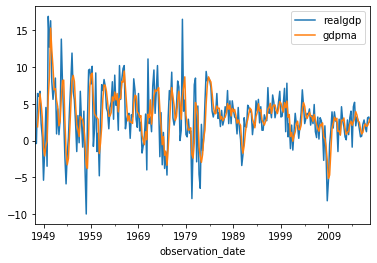

In [78]:
readgdp_tseries.plot()
plt.show()

## (3)

In [97]:
cpi_3m = cpi_tseries.resample('Q').mean()
gdp_3m = realgdp_tseries.resample('Q').mean()
cpi_3m
gdp_3m

,cpi
observation_date,
1947-03-31,21.700000
1947-06-30,22.010000
1947-09-30,22.490000
1947-12-31,23.126667
1948-03-31,23.616667
1948-06-30,23.993333
1948-09-30,24.396667
1948-12-31,24.173333
1949-03-31,23.943333


,realgdp
observation_date,
1947-06-30,-0.4
1947-09-30,-0.4
1947-12-31,6.4
1948-03-31,6.0
1948-06-30,6.7
1948-09-30,2.3
1948-12-31,0.4
1949-03-31,-5.4
1949-06-30,-1.3


In [98]:
res4C = pd.concat([cpi_3m, gdp_3m], axis = 1)
res4C['cpigrowth'] = res4C['cpi'].pct_change() * 100
res4C

,cpi,realgdp,cpigrowth
observation_date,,,
1947-03-31,21.700000,NaN,NaN
1947-06-30,22.010000,-0.4,1.428571
1947-09-30,22.490000,-0.4,2.180827
1947-12-31,23.126667,6.4,2.830888
1948-03-31,23.616667,6.0,2.118766
1948-06-30,23.993333,6.7,1.594919
1948-09-30,24.396667,2.3,1.681023
1948-12-31,24.173333,0.4,-0.915426
1949-03-31,23.943333,-5.4,-0.951462


In [99]:
_max = round(res4C['cpigrowth'].max(), 3)
_min = round(res4C['cpigrowth'].min(), 3)
print('MAX = {}\nMIN = {}'.format(_max, _min))

MAX = 4.063
MIN = -2.29


# 5번.

There is no data about this problem

In [100]:
data5 = pd.read_csv('./win_prob.csv')
data5

FileNotFoundError: [Errno 2] File ./win_prob.csv does not exist: './win_prob.csv'